<a href="https://colab.research.google.com/github/omarreess/DLI-Internship-Data-Science/blob/main/Assignment%2014%20-%20CNN%20Classification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><H1> Classificaton Task with CNN Model 

<H2> Handling Data for Model 

In [14]:
# Get Data 

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [15]:
# Checking Data Shape 
train_images.shape

(60000, 28, 28)

In [16]:
# Plot sample of data 

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
 

first_image = test_images[3]
cv2_imshow(first_image)

In [17]:
# Make Padding for Images matrix

train_images = np.pad(train_images, ((0,0),(2,2),(2, 2)), 'constant') 
test_images = np.pad(test_images, ((0,0),(2,2),(2, 2)), 'constant') 

In [18]:
# Reshaping Data 

from tensorflow.keras.utils import to_categorical

train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]

train_images.shape
 

(60000, 32, 32, 1)

In [19]:
# Labeling Data classes 

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

<H2> Make Our CNN Model  

In [20]:
# Model Layers

from tensorflow.keras import models, layers
from tensorflow.keras import Model, Input

model = models.Sequential()

model.add(layers.Conv2D(filters=10, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        260       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        4016      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

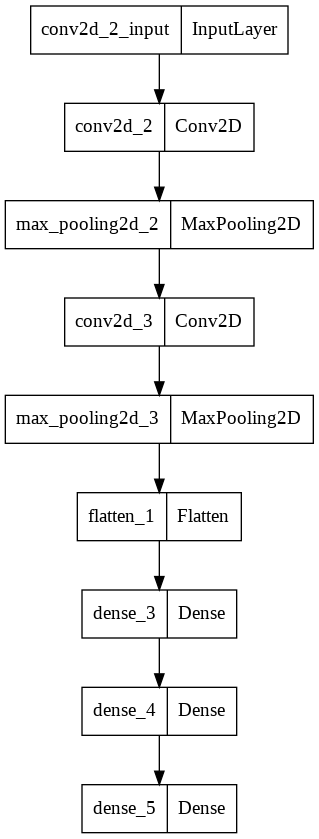

In [21]:
# Plot Model Layers

from tensorflow.keras.utils import plot_model
plot_model(model)

In [22]:
# Model's Metric & Optimizer
 
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [23]:
# Model Learning 

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 37s 78ms/step - loss: 0.8369 - accuracy: 0.8842
Epoch 2/5
469/469 [==============================] - 36s 77ms/step - loss: 0.0962 - accuracy: 0.9708
Epoch 3/5
469/469 [==============================] - 36s 77ms/step - loss: 0.0626 - accuracy: 0.9807
Epoch 4/5
469/469 [==============================] - 36s 77ms/step - loss: 0.0442 - accuracy: 0.9859
Epoch 5/5
469/469 [==============================] - 36s 77ms/step - loss: 0.0375 - accuracy: 0.9880


In [24]:
# Getting Model's Accuracy for Test data 

test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.0642 - accuracy: 0.9803
